In [1]:
%run ./Functions_PM.ipynb

Note from Poul:

"Hello - I attach the two papers I mentioned. As for the Post-Minkowskian kinematics, look at eqs. (11)-(16) in my paper with Pierre Vanhove. Start with just $f_1$ of eq. (14). We can always add the higher-order terms once we see how things go.
In eq. (11) $p_{\infty}$ is the initial 3-momentum at infinity. So you can think of

$$p_{\infty}^2 = E_\mathrm{tot} = p^2 + V_\mathrm{eff}(r)$$

as being a funny kind of Hamiltonian corresponding to a mass $m= 1/2$. Start by displacing the two black holes by impact parameter $b$ apart in transverse direction. In polar coordinates you have

$$p_r^2 = p^2 - \frac{J^2}{r^2} \qquad \to \qquad J = r \sqrt{p^2 - p_r^2}$$

where $J = bp_{\infty}$ is the conserved angular momentum (it is also $p_{\phi}$ as you recall from your Analytical Mechanics course).
Does it make sense?

Poul"


With only $f_1$ we have

$$\mathcal H(p,q) = p^2 - \left(\frac{G_N M} r \right) 2(2\gamma^2 -1) \frac{\mu^2 M}E$$

which leads to

$$\dot p_r = - \frac{\partial \mathcal H}{\partial q_r} = - \frac{\partial \mathcal H}{\partial r} = - \left( \frac{G_N M}{r^2} \right) 2(2\gamma^2 - 1) \frac{\mu^2 M}E$$

$$\dot p_\phi = - \frac{\partial \mathcal H}{\partial q_\phi} = - \frac{\partial \mathcal H}{\partial \phi} = 0$$

and because $p = \sqrt{p_r^2 + p_\phi^2/r^2}$ we have $\partial/ \partial p_r (p^2) = 2 p_r $ and similarly $\partial/ \partial p_\phi (p^2) = 2 p_\phi/r^2$, and thus

$$\dot q_r = \frac{\partial \mathcal H}{\partial p_r} = 2 p_r$$

$$\dot q_\phi = \frac{\partial \mathcal H}{\partial p_\phi} = 2 \frac{p_\phi}{r^2}$$

Now 

$$ \ddot q_r = 2 \dot p_r = - \left( \frac{G_N M}{r^2} \right) 4 (2 \gamma^2 - 1) \frac{\mu^2 M}{E} = \ddot r$$

$$\ddot q_\phi = 2 \left(\frac{\dot p_\phi}{r^2} - 2 \frac{p_\phi}{r^3} \dot r \right) = - 4 \frac{p_\phi}{r^3} \dot r = - 4 \frac{b p_\infty}{r^3} \dot r = \ddot \phi.$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

c = const.c.value
G_N = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

# c = 1
# G_N = 1
# M_sun = const.M_sun.value
# M_earth = const.M_earth.value

def findCM(x_1, x_2, m_1, m_2):
    M = m_1 + m_2
    r_cm = (m_1*x_1 + m_2*x_2)/M
    return r_cm

def parameters(s):
    x_1, x_2, v_1, v_2, m_1, m_2 = s
    r_vec = x_1 - x_2
    v_vec = v_1 - v_2
    r = np.linalg.norm(r_vec)
    v = np.linalg.norm(v_vec)
    M = m_1 + m_2
    μ = m_1*m_2/M
    ν = μ/M

    γ = 1/np.sqrt(1 - v**2/c**2)
    E_eff = μ*γ*c**2
    E = c**2*M*np.sqrt(1 + 2*ν*(E_eff/μ - 1))

    b = np.abs(np.cross(r_vec, v_vec)/v)
    p_inf = c*np.sqrt((E**2/c**4 - (m_1 + m_2)**2)*(E**2/c**4 - (m_1 - m_2)**2)/(4*E**2/c**4))
    J = b*p_inf
    return J, E, γ, b, p_inf, E_eff

# def TBtoEOB(x_1, x_2, v_1, v_2):
#     r_vec = x_1 - x_2
#     v_vec = v_1 - v_2
#     r = r_vec[0]
#     v = v_vec[0]
#     # r = np.linalg.norm(r_vec)
#     # v = np.linalg.norm(v_vec)
#     return r_vec, r, v_vec, v

def accPM(pos, vel, x_cm, v_cm, m_1, m_2, J, E, γ):
    M = m_1 + m_2
    μ = m_1*m_2/M
    
    r_vec = pos - x_cm
    v_vec = vel - v_cm
    r = np.linalg.norm(r_vec)
    v = np.linalg.norm(v_vec)

    x, y = r_vec[0], r_vec[1]
    vx, vy = v_vec[0], v_vec[1]

    # a_r = - (G_N*M/r**2)*8*(2*γ**2 - 1)*μ**2*M/E
    # a_φ = -8*J/r**3*v

    a_x = x/r**2*(-G_N*M**2*μ**2/(r*E/c**2) * 4*(2*γ**2 - 1) + v**2 - vx**2 - vy**2 - 1/r**2*(y*vy - vx/x*y**2 - 4*J*(y*vx + vy/x*y**2)))
    a_y = y/r**2*(-G_N*M**2*μ**2/(r*E/c**2) * 4*(2*γ**2 - 1) + v**2 - vx**2 - vy**2 - 1/r**2*(x*vx - vy/y*x**2 + 4*J*(x*vy + vx/y*x**2)))

    a_vec = np.array([a_x, a_y])
    return a_vec

def boostPM(v_vec, a_vec, dt):
    v_vec += a_vec*dt
    return v_vec

def movePM(r_vec, v_vec, dt):
    r_vec += v_vec*dt
    return r_vec

# def EOBtoTB(r_vec, v_vec, m_1, m_2):
#     M = m_1 + m_2
#     x_1 = m_2/M*r_vec
#     x_2 = m_1/M*r_vec
#     v_1 = m_2/M*v_vec
#     v_2 = m_1/M*v_vec
#     return np.array([x_1, x_2]), np.array([v_1, v_2])

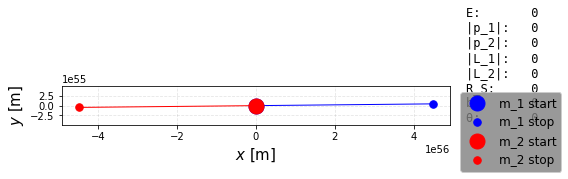

In [8]:
m_1 = 10*M_sun
m_2 = 10*M_sun
R_S = 2*(m_1 + m_2)*G_N/c**2
x_1 = np.array([-100., -1.])*R_S
x_2 = np.array([0.,     0.])*R_S
v_1 = np.array([0.1,    0.])*c
v_2 = np.array([0.,     0.])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

x_cm = findCM(x_1, x_2, m_1, m_2)
v_cm = findCM(v_1, v_2, m_1, m_2)
J, E, γ, b, p_inf, E_eff = parameters(s)

t_max = 1e3*R_S/c
dt = t_max/5e4

pos1 = np.zeros((2, int(t_max/dt)))
pos2 = np.zeros((2, int(t_max/dt)))
pos_CM = np.zeros((2, int(t_max/dt)))

for i in range(int(t_max/dt)):
    x_cm = findCM(x_1, x_2, m_1, m_2)
    v_cm = findCM(v_1, v_2, m_1, m_2)

    pos1[:,i] = x_1
    pos2[:,i] = x_2
    pos_CM[:,i] = x_cm

    a_1, a_2 = accPM(x_1, v_1, x_cm, v_cm, m_1, m_2, J, E, γ), accPM(x_2, v_2, x_cm, v_cm, m_1, m_2, J, E, γ)
    v_1, v_2 = boostPM(v_1, a_1, dt), boostPM(v_2, a_2, dt)
    x_1, x_2 = movePM(x_1, v_1, dt), movePM(x_2, v_2, dt)


pos1 = pos1 - pos_CM
pos2 = pos2 - pos_CM
pos_CM = np.zeros((2, int(t_max/dt)))

params = [0,0,0,0,0,0,0,0]
orbPlotter(pos1, pos2, pos_CM, params)

In [9]:
pos1

array([[-2.95325008e+06,  8.96718561e+51,  1.79343712e+52, ...,
         4.48332379e+56,  4.48341346e+56,  4.48350313e+56],
       [-2.95325008e+04,  8.96718561e+49,  1.79343712e+50, ...,
         4.48332379e+54,  4.48341346e+54,  4.48350313e+54]])


___
From PHD & Pierre Vanhove:

$$p^2 = p_\infty^2 - V_\mathrm{eff}(r, E),$$

where, in $D = 4$ dimensions,

$$V_\mathrm{eff}(r, E) = - \sum_{n=1}^\infty f_n \left( \frac{G_N M} r \right)^n $$

where $M = m_1 + m_2$ and the coefficients $f_i$ for $n=1,2,3$ are given by

$$f_1 = 2 \left(2 \gamma^2 - 1 \right) \frac{\mu^2 M} E, \qquad f_2 = \frac{3 \left(5 \gamma^2 - 1 \right)}{2} \frac{\mu^2 M} E \qquad \text{and}$$
\begin{align*}
f_3 &= - \mu^2 \left(- \frac 3 2 \frac{\left(2 \gamma^2 - 1 \right)\left(5 \gamma^2 - 1 \right)}{\gamma^2 - 1} + 2 \frac{12 \gamma^4 - 10\gamma^2 + 1}{\gamma^2 -1} \frac{E}{M}\right)\\
& \quad -\frac 2 3 \frac{\mu^2 \nu M}{E} \left(2 \gamma (14 \gamma^2 + 25) - \frac{(1 - 2\gamma^2)^2}{(\gamma^2 - 1)^2} (8 - 5 \gamma^2) \sqrt{\gamma^2 - 1} + \left(\frac{6 (4 \gamma^4 - 12 \gamma^2 - 3)}{ \sqrt{\gamma^2 -1 }} - \frac{(6 \gamma^3 - 9 \gamma) (1 - 2 \gamma^2)^2 }{(\gamma^2 - 1)^2} \right) \mathrm{arccosh}(\gamma) \right)
\end{align*}
with $\nu = \mu/M = m_1 m_2 / (m_1 + m_2)^2$ and $E = M \sqrt{1 + 2 \nu (\gamma - 1)}$

This all means that

\begin{align*}
p^2 = p_\infty^2 &- \left( \frac{G_N M}{r} \right) 2 \left(2 \gamma^2 - 1 \right) \frac{\mu^2 M} E\\
    & - \left( \frac{G_N M}{r} \right)^2 \frac{3 \left(5 \gamma^2 - 1 \right)}{2} \frac{\mu^2 M} E\\
    & + \left( \frac{G_N M}{r} \right)^3 \Bigg\{\mu^2 \left(- \frac 3 2 \frac{\left(2 \gamma^2 - 1 \right)\left(5 \gamma^2 - 1 \right)}{\gamma^2 - 1} + 2 \frac{12 \gamma^4 - 10\gamma^2 + 1}{\gamma^2 -1} \frac{E}{M}\right)\\
    & \qquad + \frac 2 3 \frac{\mu^2 \nu M}{E} \left(2 \gamma (14 \gamma^2 + 25) - \frac{(1 - 2\gamma^2)^2}{(\gamma^2 - 1)^2} (8 - 5 \gamma^2) \sqrt{\gamma^2 - 1} + \left(\frac{6 (4 \gamma^4 - 12 \gamma^2 - 3)}{ \sqrt{\gamma^2 -1 }} - \frac{(6 \gamma^3 - 9 \gamma) (1 - 2 \gamma^2)^2 }{(\gamma^2 - 1)^2} \right) \mathrm{arccosh}(\gamma) \right)\Bigg\}
\end{align*}

which in code will be

In [5]:
# G = const.G.value

# def findγ(v_1, v_2):
#     v = np.linalg.norm(v_1 - v_2)
#     γ = 1/np.sqrt(1 - v**2)
#     return γ

# def findpCM(x, p, p_inf, γ, m_1, m_2, order = 1):
#     M = m_1 + m_2
#     μ = (m_1 + m_2)/M
#     ν = μ/M
#     E = M*np.sqrt(1 + 2*ν*(γ - 1))
#     r = x

#     if order == 1:
#         f_1 = 2*(2*γ - 1)*μ**2*M/E
#         f_2 = 0
#         f_3 = 0
#     elif order == 2:
#         f_1 = 2*(2*γ - 1)*μ**2*M/E
#         f_2 = 3*(5*γ**2 - 1)/2*μ**2*M/E
#         f_3 = 0
#     elif order == 3:
#         f_1 = 2*(2*γ - 1)*μ**2*M/E
#         f_2 = 3*(5*γ**2 - 1)/2*μ**2*M/E
#         f_3 = (μ**2*(-3/2*(2*γ**2 -1)*(5*γ**2 - 1)/(γ**2 - 1)  +  2*(12*γ**4 - 10*γ**2 + 1)/(γ**2 - 1)*E/M)  +  2/3*μ**2*ν*M/E*(2*γ*(14*γ**2 + 25)  -  (1 - 2*γ**2)**2/(γ**2 - 1)**2*(8 - 5*γ**2)*np.sqrt(γ**2 - 1)  +  (6*(4*γ**4 - 12*γ**2 -3)/np.sqrt(γ**2 - 1)  -  (6*γ**3 - 9*γ)*(1 - 2*γ**2)**2/(γ**2 - 1)**2)*np.arccosh(γ)))

#     p2 = p_inf**2  +  (G*M/r)*f_1  +  (G*M/r)**2*f_2   -   (G*M/r)**3*f_3
#     p = np.sqrt(p2)
#     return p

# def findxCM(x, p, γ, m_1, m_2, dt):
#     x += p*dt
#     return x

In [6]:
# m_1 = 1e-9*M_sun
# m_2 = M_sun

# R_S = 2*(m_1 + m_2)*G/c**2

# x_1 = np.array([1000, 0.])*R_S
# x_2 = np.array([0.,   0.])*R_S
# p_1 = np.array([0., 0.01])
# p_2 = np.array([0., 0.01])

# s = x_1, x_2, p_1, p_2, m_1, m_2

# t_max = 10000
# dt = 100

# x = x_1 - x_2
# p_inf = np.linalg.norm(p_1 - p_2) 

# pos1 = np.zeros((2, int(t_max/dt)))
# pos2 = np.zeros((2, int(t_max/dt)))
# pos_CM = np.zeros((2, int(t_max/dt)))

# for i in range(int(t_max/dt)):
#     pos1[:,i] = x
#     p = findpCM(x, p, γ, p_inf, m_1, m_2)
#     x = findxCM(x, p, dt)

# plt.plot(pos1[0], pos1[1])
